# Facial landmarks with dlib and OpenCV

Detecting facial landmarks is a subset of the shape prediction problem. Given an input image (and normally an ROI that specifies the object of interest), a shape predictor attempts to localize key points of interest along the shape.

In the context of facial landmarks, our goal is detect important facial structures on the face using shape prediction methods.

Detecting facial landmarks is therefore a two step process:

* Step #1: Localize the face in the image.
* Step #2: Detect the key facial structures on the face ROI.

The pre-trained facial landmark detector inside the dlib library is used to estimate the location of 68 (x, y)-coordinates that map to facial structures on the face.

The indexes of the 68 coordinates can be visualized on the image below:


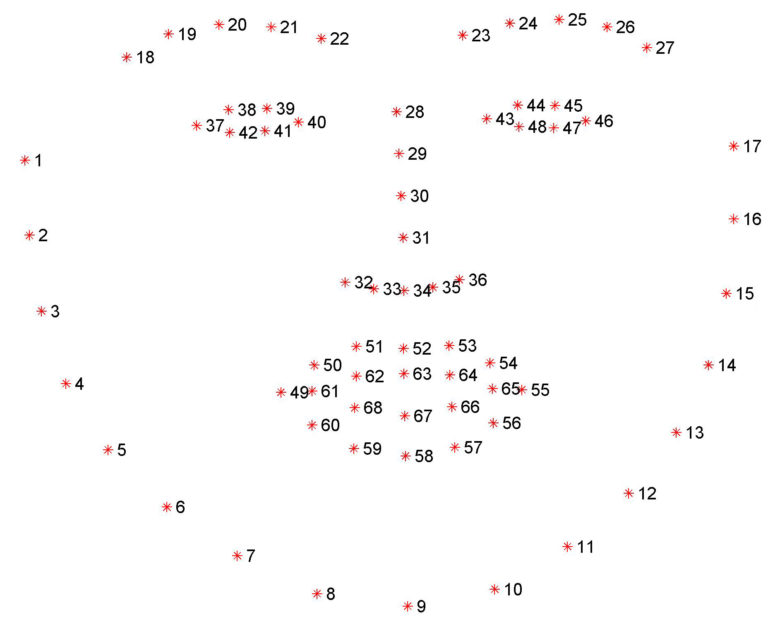

In [3]:
from imutils import face_utils 
import numpy as np 
import argparse 
import dlib
import cv2
import imutils

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'dlib'

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor()

In [23]:
im_path = 'dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset/caiguoqing/0_0_caiguoqing_0075.jpg'
image = cv2.imread(im_path)

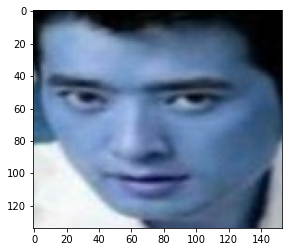

In [31]:
cv2.imshow(image)

In [39]:
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

In [41]:
rects

rectangles[]

In [42]:
gray.shape

(437, 500)

In [43]:
shape = predictor(gray)


TypeError: __call__(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.shape_predictor, image: array, box: _dlib_pybind11.rectangle) -> _dlib_pybind11.full_object_detection

Invoked with: <_dlib_pybind11.shape_predictor object at 0x7f3434a6aaf0>, array([[  4,   4,   4, ...,   2,   2,   2],
       [  4,   4,   4, ...,   2,   2,   2],
       [  4,   4,   4, ...,   2,   2,   2],
       ...,
       [237, 237, 237, ..., 185, 185, 185],
       [237, 237, 237, ..., 185, 185, 185],
       [237, 237, 237, ..., 185, 185, 185]], dtype=uint8), [(0, 437, 0, 500)]

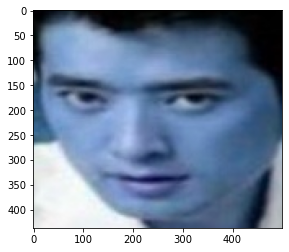

In [38]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
# show the output image with the face detections + facial landmarks
plt.imshow(image)
